In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
train_data=pd.read_csv('Train_Data.csv', sep=',')
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


<Axes: ylabel='Density'>

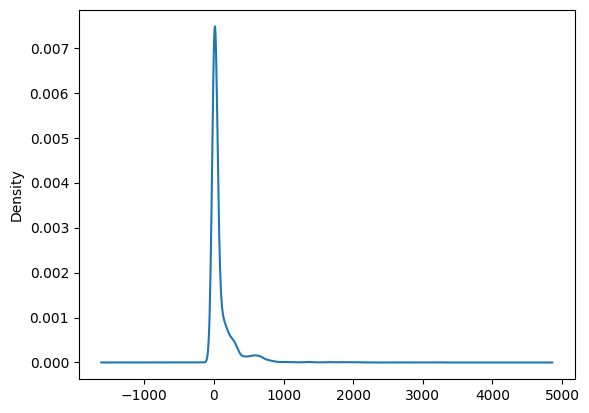

In [ ]:
train_data['impressions'].plot(kind='kde')

In [ ]:
test_data=pd.read_csv('Test_Data.csv', sep=',')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad           318 non-null    object 
 4   cost         318 non-null    float64
 5   impressions  318 non-null    int64  
 6   clicks       318 non-null    int64  
 7   conversions  318 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 20.0+ KB


In [ ]:
train_data['date']=pd.to_datetime(train_data['date'])
test_data['date']=pd.to_datetime(test_data['date'])

<ipython-input-5-b9981f9776f1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['date']=pd.to_datetime(train_data['date'])
<ipython-input-5-b9981f9776f1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data['date']=pd.to_datetime(test_data['date'])


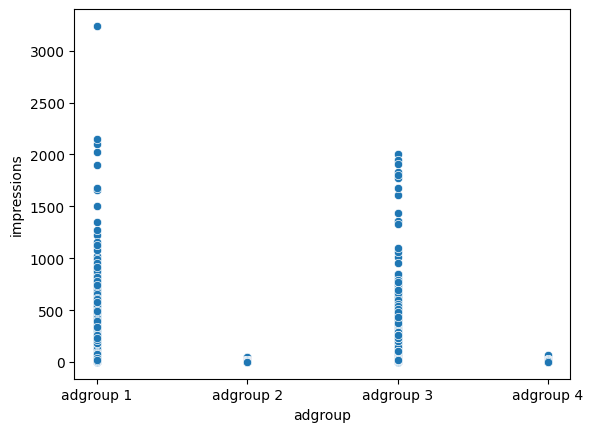

In [ ]:
sns.scatterplot(train_data, x='adgroup', y='impressions')
plt.show()

<Axes: xlabel='adgroup', ylabel='count'>

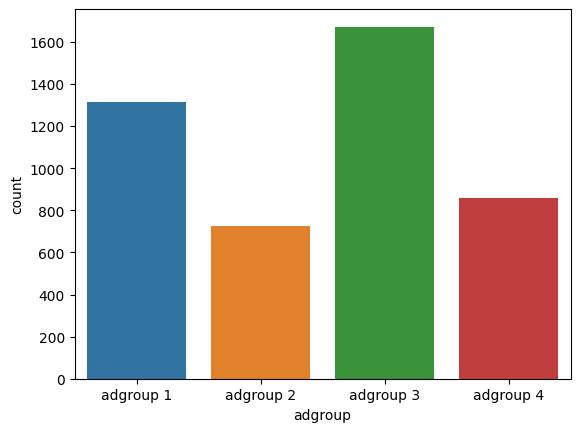

In [ ]:
sns.countplot(train_data, x='adgroup')

In [ ]:
ad1=train_data[train_data['adgroup']=='adgroup 1']
ad2=train_data[train_data['adgroup']=='adgroup 2']
ad3=train_data[train_data['adgroup']=='adgroup 3']
ad4=train_data[train_data['adgroup']=='adgroup 4']

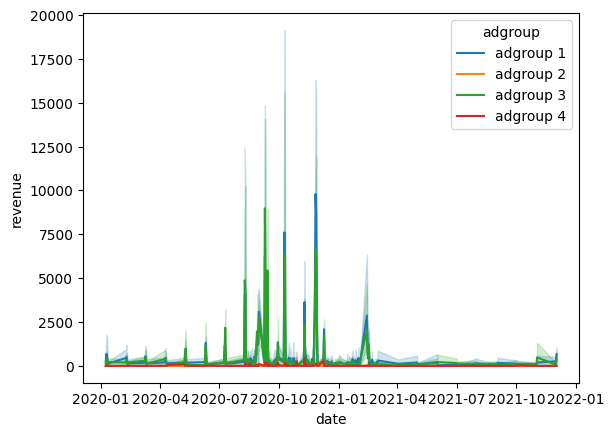

In [ ]:
sns.lineplot(train_data, x='date', y='revenue', hue='adgroup')
plt.show()

In [ ]:
train_data=train_data.drop(columns=['campaign', 'ad', 'date'])
test_data=test_data.drop(columns=['campaign', 'ad', 'date'])

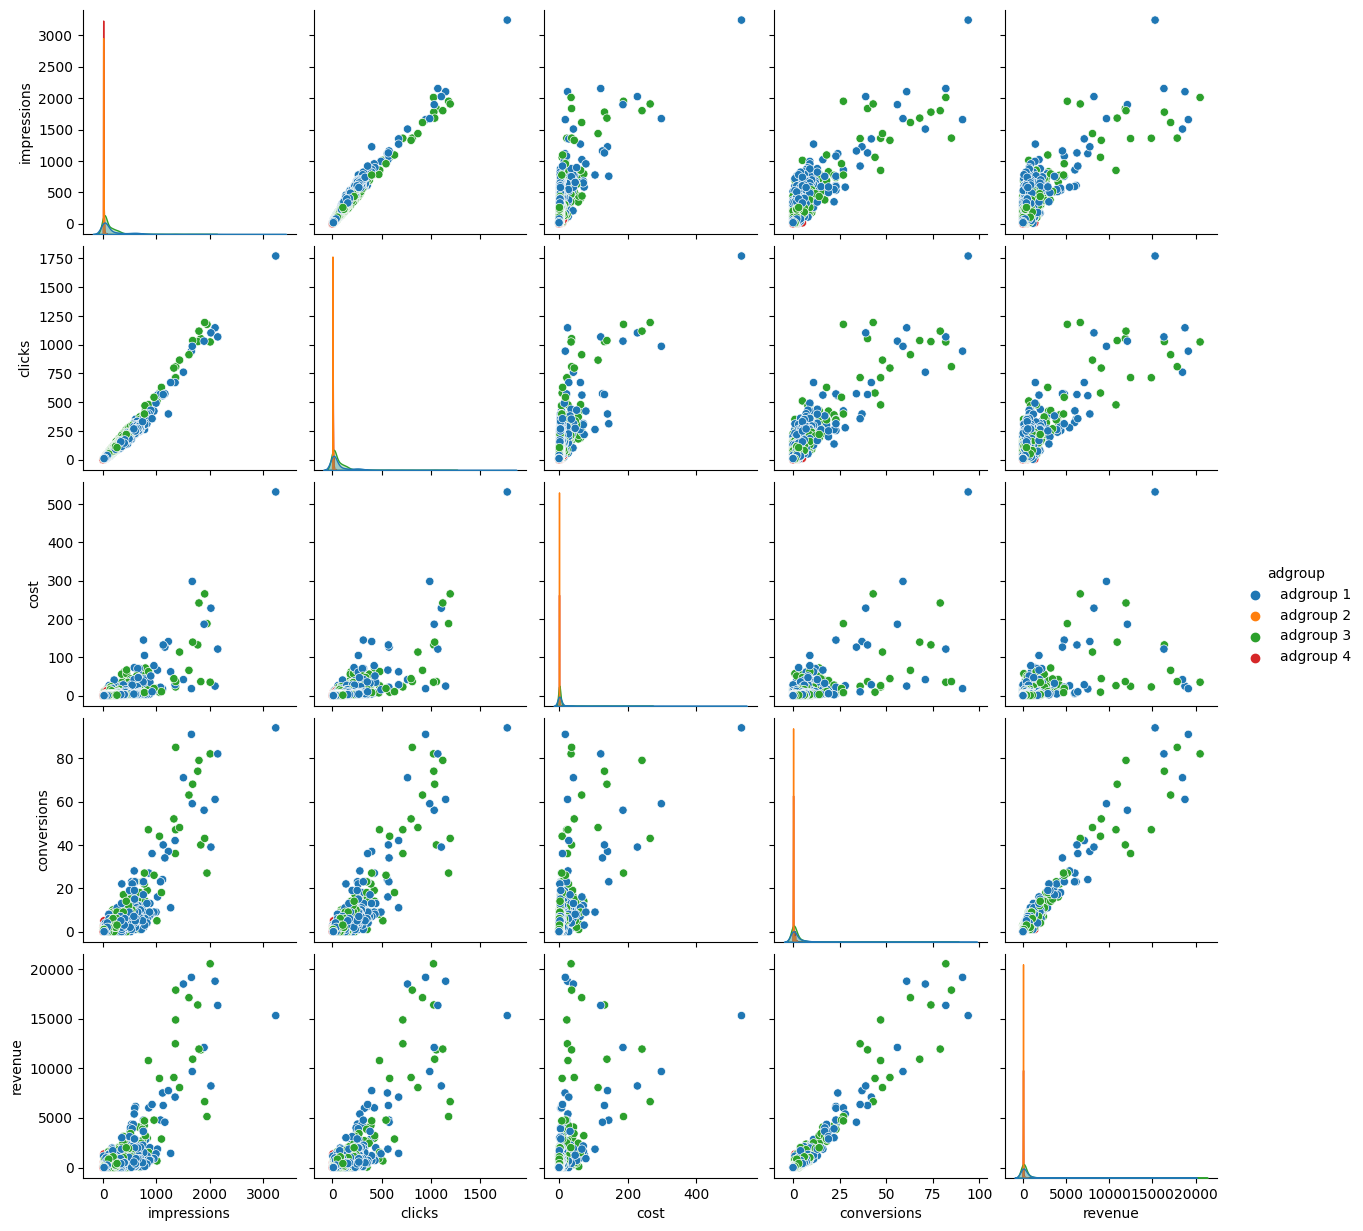

In [ ]:
sns.pairplot(train_data, hue='adgroup')
plt.show()

<ipython-input-13-e89d2e8f7a50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap='Blues', annot=True)


<Axes: >

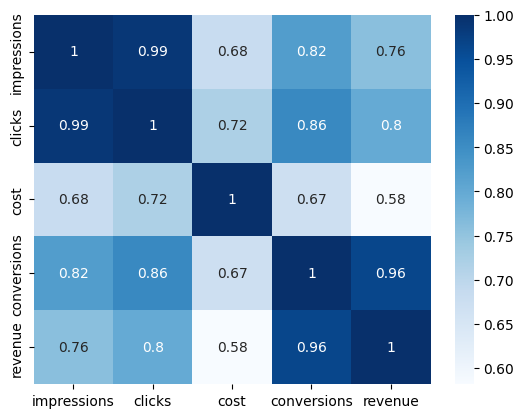

In [ ]:
sns.heatmap(train_data.corr(), cmap='Blues', annot=True)

<ipython-input-14-5b2514b058e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['impressions'])


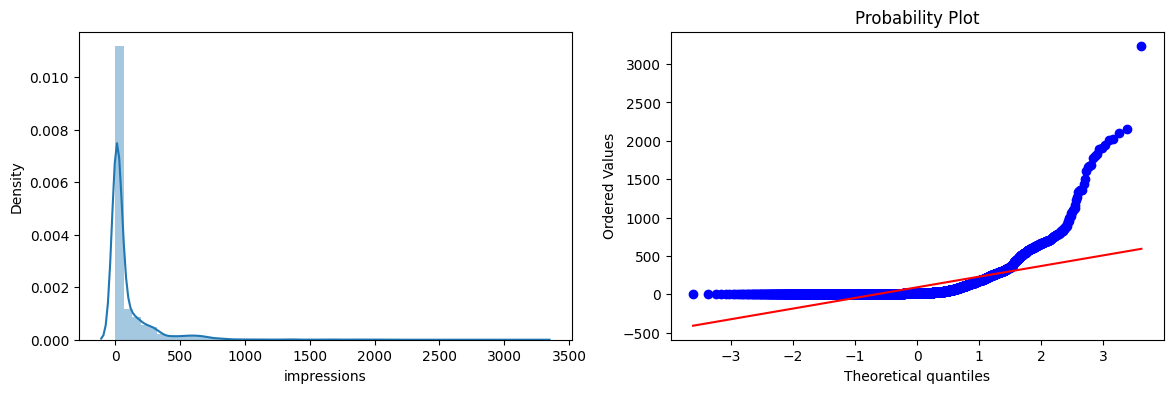

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['impressions'])

plt.subplot(122)
stats.probplot(train_data['impressions'], dist="norm", plot=plt)

plt.show()

<ipython-input-15-49554ec1ff5b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['cost'])


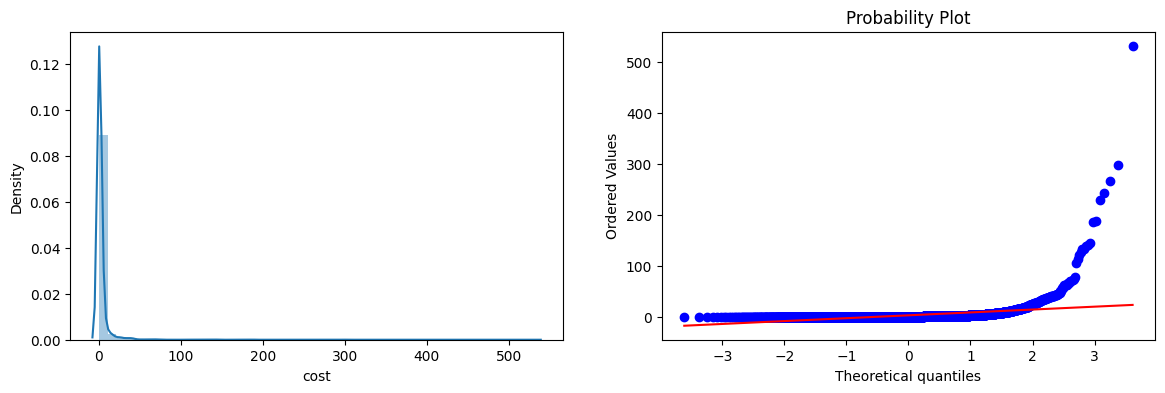

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['cost'])

plt.subplot(122)
stats.probplot(train_data['cost'], dist="norm", plot=plt)

plt.show()

<ipython-input-16-5537d7f1a94a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['clicks'])


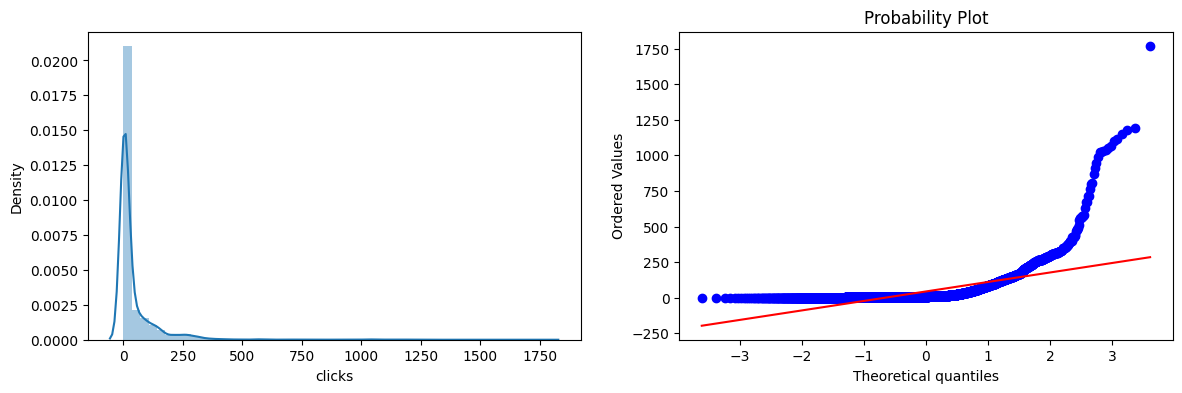

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['clicks'])

plt.subplot(122)
stats.probplot(train_data['clicks'], dist="norm", plot=plt)

plt.show()

<ipython-input-17-f8d284ac5250>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['conversions'])


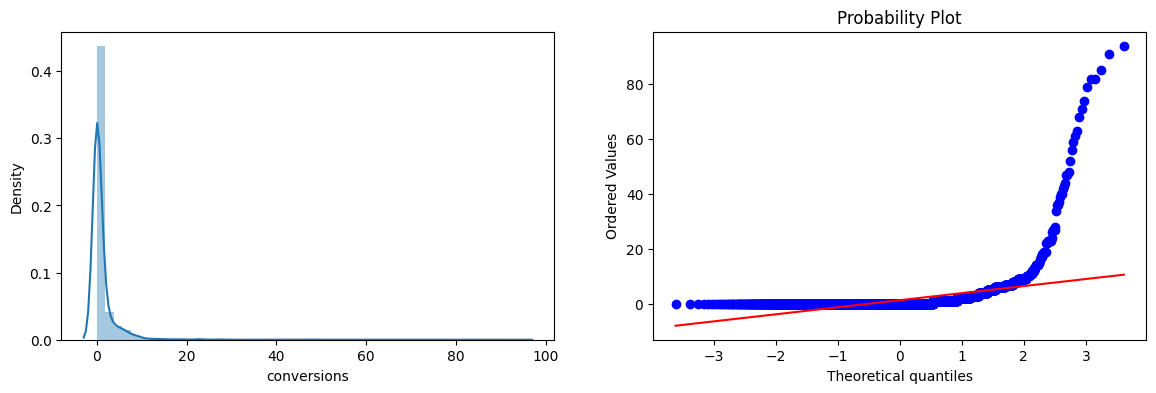

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['conversions'])

plt.subplot(122)
stats.probplot(train_data['conversions'], dist="norm", plot=plt)

plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
train_data.head()

,adgroup,impressions,clicks,cost,conversions,revenue
0,adgroup 1,24,6,0.08,0,0.00
1,adgroup 2,1,0,0.00,0,0.00
2,adgroup 3,13,4,0.04,0,0.00
3,adgroup 4,5,4,0.08,0,0.00
4,adgroup 1,247,126,1.29,4,925.71


In [ ]:
train_data = pd.get_dummies(train_data, columns=["adgroup"])

In [ ]:
pt=PowerTransformer()

cols=[ 'impressions', 'clicks']

train_data[cols]=pt.fit_transform(train_data[cols])

In [ ]:
trf = FunctionTransformer(np.log1p)
tr2=PowerTransformer()

col=['conversions', 'cost']

train_data[col]=tr2.fit_transform(train_data[col])

<ipython-input-24-5b2514b058e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['impressions'])


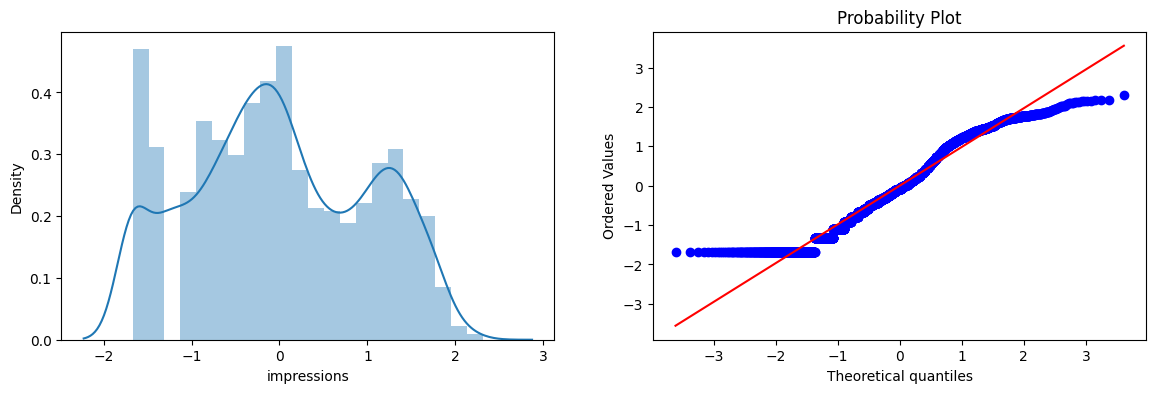

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['impressions'])

plt.subplot(122)
stats.probplot(train_data['impressions'], dist="norm", plot=plt)

plt.show()

<ipython-input-25-f8d284ac5250>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['conversions'])


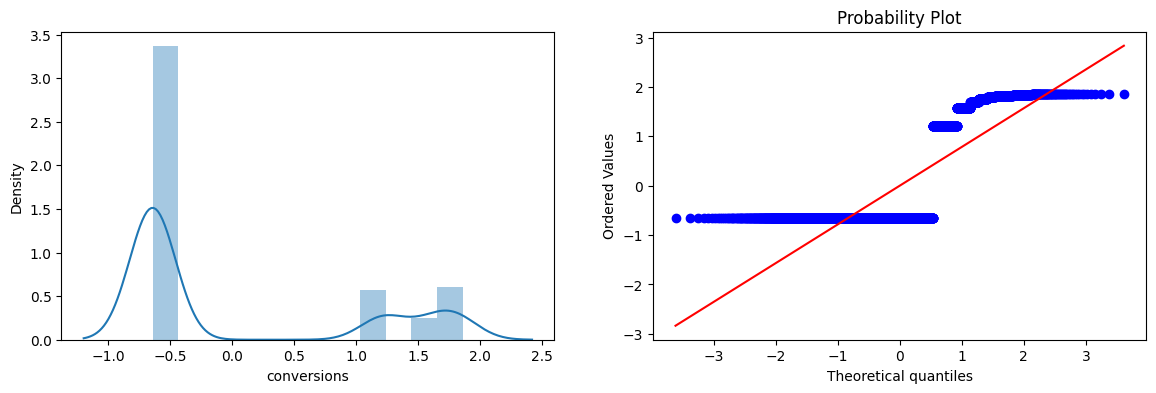

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['conversions'])

plt.subplot(122)
stats.probplot(train_data['conversions'], dist="norm", plot=plt)

plt.show()

<ipython-input-26-49554ec1ff5b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['cost'])


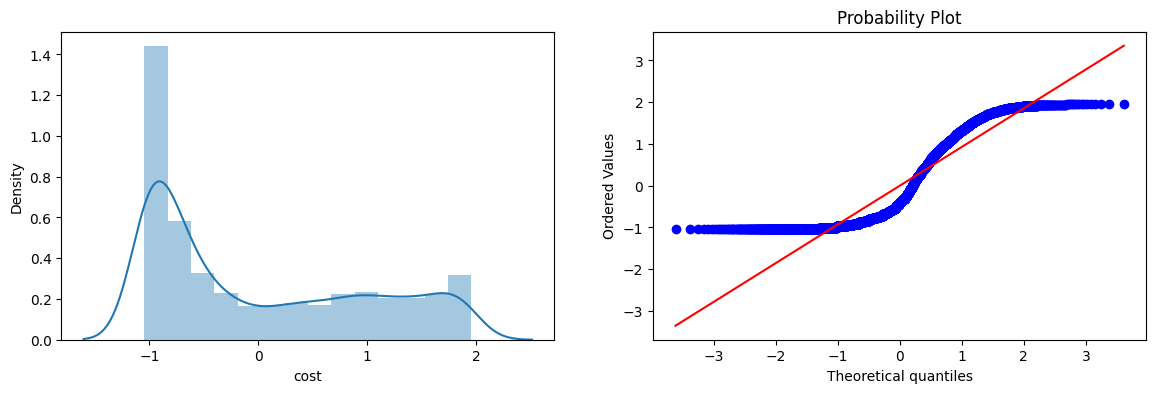

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['cost'])

plt.subplot(122)
stats.probplot(train_data['cost'], dist="norm", plot=plt)

plt.show()

<ipython-input-27-5537d7f1a94a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['clicks'])


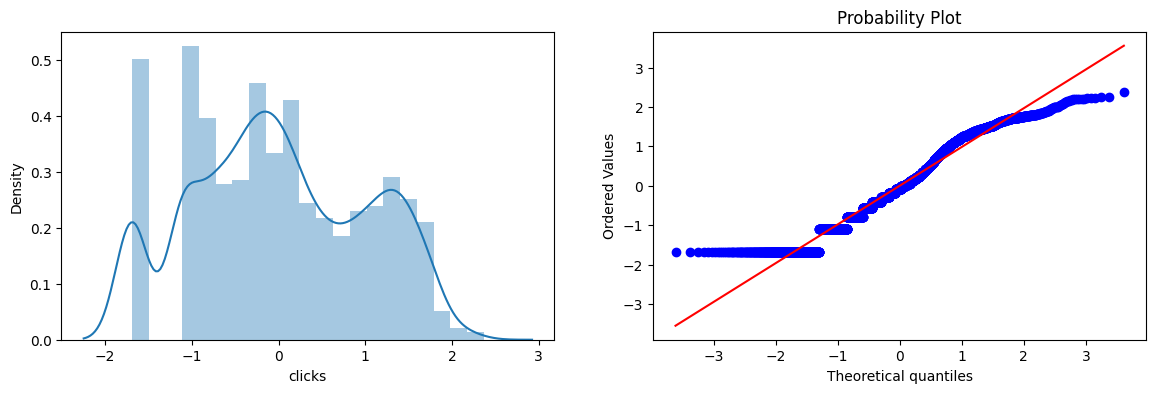

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train_data['clicks'])

plt.subplot(122)
stats.probplot(train_data['clicks'], dist="norm", plot=plt)

plt.show()

In [ ]:
# tr3 = SelectKBest(score_func=chi2,k=all)

In [ ]:
tr4 = LinearRegression()

In [ ]:
train_data.head()

,impressions,clicks,cost,conversions,revenue,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,0.165523,-0.180342,-0.776415,-0.643494,0.00,1,0,0,0
1,-1.670261,-1.691606,-1.046039,-0.643494,0.00,0,1,0,0
2,-0.201101,-0.411930,-0.905467,-0.643494,0.00,0,0,1,0
3,-0.792581,-0.411930,-0.776415,-0.643494,0.00,0,0,0,1
4,1.359614,1.406463,0.866418,1.756795,925.71,1,0,0,0


In [ ]:
y=train_data['revenue']
X=train_data.drop(columns=['revenue'])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.23, random_state=42)

In [ ]:
tr4.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=tr4.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

766.4450468793735


In [ ]:
model = Sequential()
model.add(Dense(600,input_dim=8, activation= "relu"))
model.add(Dense(200, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
110/110 [==============================] - 7s 4ms/step - loss: 1249297.0000 - mean_squared_error: 1249297.0000
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 1078805.8750 - mean_squared_error: 1078805.8750
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 1052670.0000 - mean_squared_error: 1052670.0000
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 1027852.4375 - mean_squared_error: 1027852.4375
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 986208.1250 - mean_squared_error: 986208.1250
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 940947.6875 - mean_squared_error: 940947.6875
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 918707.6250 - mean_squared_error: 918707.6250
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 852412.2500 - mean_squared_error: 852412.2500
Epoch 9/30
110/110 [============

In [ ]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

110/110 [==============================] - 0s 2ms/step
563.8289367144951
33/33 [==============================] - 0s 2ms/step
577.0884648777135


In [ ]:
pred

array([[  1.8597394],
       [-16.852663 ],
       [272.59973  ],
       ...,
       [-15.211672 ],
       [-13.540163 ],
       [192.39868  ]], dtype=float32)

In [ ]:
res = pd.DataFrame(pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["revenue"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')
files.download('prediction_results.csv')

ValueError: ignored